In [3]:
import inspect
import numpy as np
from matplotlib import pyplot


In [8]:
def custom(twidth,  dt, ramp_fraction=0.25, ramp_length=None):
    if ramp_length is None:
        tedge=np.arange(0, 2*twidth*ramp_fraction, dt)
    else:
        tedge=np.arange(0, 2*ramp_length, dt)
        ramp_fraction=1.0*ramp_length/twidth
    t=np.arange(0e-9, twidth, dt)
    print(t.shape)
    width=len(t)
    if (ramp_fraction>0 and ramp_fraction<=0.25 and twidth>0):
        f=1.0/(2*ramp_fraction*twidth)
        edges=(np.cos(2*np.pi*f*tedge-np.pi)+1.0)/2.0
        nramp=int(len(edges)/2)
        nflat=int(width-(len(edges)+nramp/2))
        env=np.concatenate((edges[:(int(nramp/2)+nramp)], 0.5*np.ones(nflat), 0.5*edges[nramp:]))
        pyplot.plot(env,linewidth=3)
        pyplot.show()
    else:
        print('ramp_fraction (ramp_length/twidth) should be 0<ramp_function<=0.5, %s and twidth>0 %s'%(str(ramp_fraction), str(twidth)))
        env=np.ones(width)
    return (t, env.astype('complex64'))



(1000,)


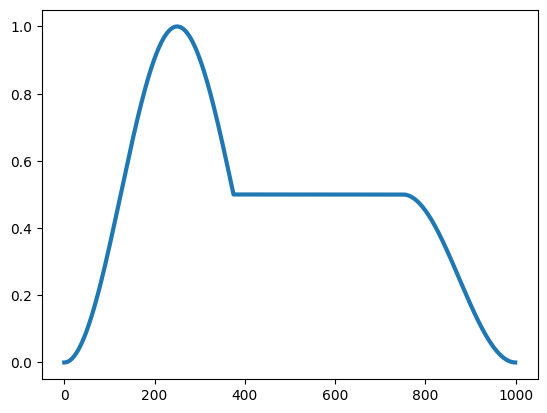

(array([0.000e+00, 2.000e-09, 4.000e-09, 6.000e-09, 8.000e-09, 1.000e-08,
        1.200e-08, 1.400e-08, 1.600e-08, 1.800e-08, 2.000e-08, 2.200e-08,
        2.400e-08, 2.600e-08, 2.800e-08, 3.000e-08, 3.200e-08, 3.400e-08,
        3.600e-08, 3.800e-08, 4.000e-08, 4.200e-08, 4.400e-08, 4.600e-08,
        4.800e-08, 5.000e-08, 5.200e-08, 5.400e-08, 5.600e-08, 5.800e-08,
        6.000e-08, 6.200e-08, 6.400e-08, 6.600e-08, 6.800e-08, 7.000e-08,
        7.200e-08, 7.400e-08, 7.600e-08, 7.800e-08, 8.000e-08, 8.200e-08,
        8.400e-08, 8.600e-08, 8.800e-08, 9.000e-08, 9.200e-08, 9.400e-08,
        9.600e-08, 9.800e-08, 1.000e-07, 1.020e-07, 1.040e-07, 1.060e-07,
        1.080e-07, 1.100e-07, 1.120e-07, 1.140e-07, 1.160e-07, 1.180e-07,
        1.200e-07, 1.220e-07, 1.240e-07, 1.260e-07, 1.280e-07, 1.300e-07,
        1.320e-07, 1.340e-07, 1.360e-07, 1.380e-07, 1.400e-07, 1.420e-07,
        1.440e-07, 1.460e-07, 1.480e-07, 1.500e-07, 1.520e-07, 1.540e-07,
        1.560e-07, 1.580e-07, 1.600e-0

In [9]:
custom(twidth=2e-06,dt=2e-09)

In [26]:
def cos_edge_square(twidth,  dt, ramp_fraction=0.01, ramp_length=None):
    if ramp_length is None:
        tedge=np.arange(0, 2*twidth*ramp_fraction, dt)
    else:
        tedge=np.arange(0, 2*ramp_length, dt)
        ramp_fraction=1.0*ramp_length/twidth
    t=np.arange(0, twidth, dt)
    width=len(t)
    if (ramp_fraction>0 and ramp_fraction<=0.5 and twidth>0):
        f=1.0/(2*ramp_fraction*twidth)
        edges=(np.cos(2*np.pi*f*tedge-np.pi)+1.0)/2.0
      
        nramp=int(len(edges)/2)
        nflat=width-len(edges)
        env=np.concatenate((edges[:nramp], np.ones(nflat), edges[nramp:]))
    else:
        print('ramp_fraction (ramp_length/twidth) should be 0<ramp_function<=0.5, %s and twidth>0 %s'%(str(ramp_fraction), str(twidth)))
        env=np.ones(width)
    # pyplot.plot(env, linewidth=3)
    # pyplot.show()
    return (t, env.astype('complex64'))


def square(twidth, dt, amplitude=1.0, phase=0.0):
    """A simple square pulse"""
    t=np.arange(0, twidth, dt)
    width=len(t)
    return (t, (np.ones(width)*amplitude*np.exp(1j*phase)).astype('complex64'))

def gaussian(twidth, dt, sigmas=3):
    """
    Width is the exact width, not the width of the sigmas.
    sigmas is the number of sigma in the width in each side
    """
    #print 'gaussian', twidth, dt, sigmas
    t=np.arange(0, twidth, dt)
    #print len(t), len(np.arange(0, 4e-6, 1e-9))
    width=len(t)
    sigma = width / (2.0 * sigmas)  # (width - 1 )?
    val=np.exp(-(np.arange(0, width) - width / 2.) ** 2. / (2 * sigma ** 2)).astype('complex64')
    #print twidth, dt, width, len(t), len(val)
    #print t, val
    return (t, val)

def DRAG(twidth, dt, sigmas=3, alpha=0.5, delta=-268e6,  df=0):
    """Standard DRAG pulse as defined in https://arxiv.org/pdf/0901.0534.pdf
    Derivative Removal by Adiabatic Gate (DRAG)
    Args:
        width: the total width of the pulse in points
        alpha: alpha parameter of the DRAG pulse 0-3e6 scan 
        sigmas: number of standard deviations
        delta: the anharmonicity of the qubit
        sample_rate: AWG sample rate (default 2.5 GHz), and not used in this method.
        df: additional detuning from target frequency
        """
    #  why use kargs pass that? try use the value directly
    #delta = kargs.get('sample_rate', delta)
    t=np.arange(0, twidth, dt)
    width=len(t)

    sigma = width / (2. * sigmas) #(width - 1)?
    delta = float(delta * 2 * np.pi *dt)
    x = np.arange(0,  width)
    #gaus = np.exp(-(x - width / 2.) ** 2. / (2 * sigma ** 2))
    _, gaus = gaussian(twidth, dt, sigmas)
    dgaus = -(x - width / 2.) / (sigma ** 2) * gaus
    p1=np.exp(1j* x * 1.0*df * dt *  2 * np.pi) 
    p2=(gaus - 1j * alpha * dgaus / delta)
    return (t, (p1*p2).astype('complex64'))

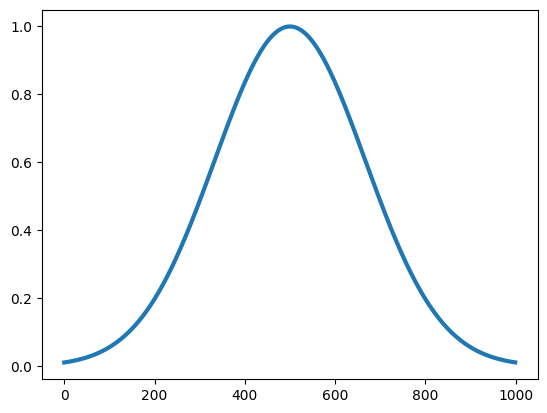

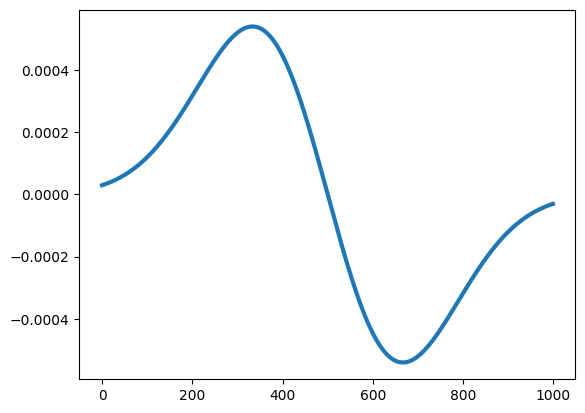

In [27]:
t,env=DRAG(2e-06,2e-09)
pyplot.plot(env.real, linewidth=3)
pyplot.show()

pyplot.plot(env.imag, linewidth=3)
pyplot.show()

In [41]:
print((env.shape))

(1000,)


<class 'numpy.ndarray'>


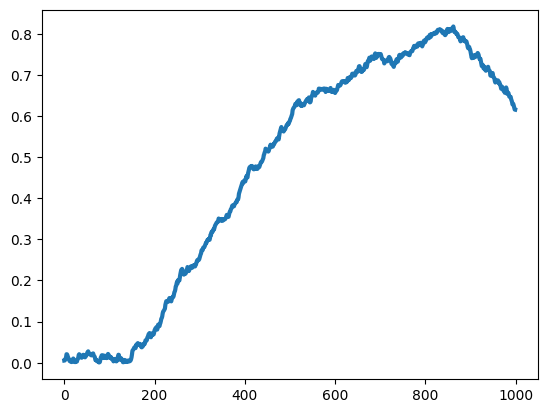

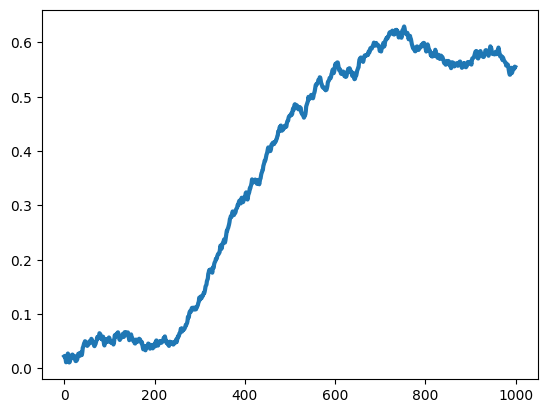

(1000,)


In [6]:
import json
import numpy as np

with open('../data/Weighted_dlo/envolope.json', 'r') as f:
    json_data = json.load(f)

# Extract "real" and "imag" arrays
real_values = json_data['Q1']['real']
imag_values = json_data['Q1']['imag']

# Create a NumPy array
complex_array = np.array(real_values) + 1j * np.array(imag_values)

# Print the resulting NumPy array
# print(complex_array)
env = complex_array
print(type(env))
pyplot.plot(env.real, linewidth=3)
pyplot.show()
pyplot.plot(env.imag, linewidth=3)
pyplot.show()
print(env.shape)